1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


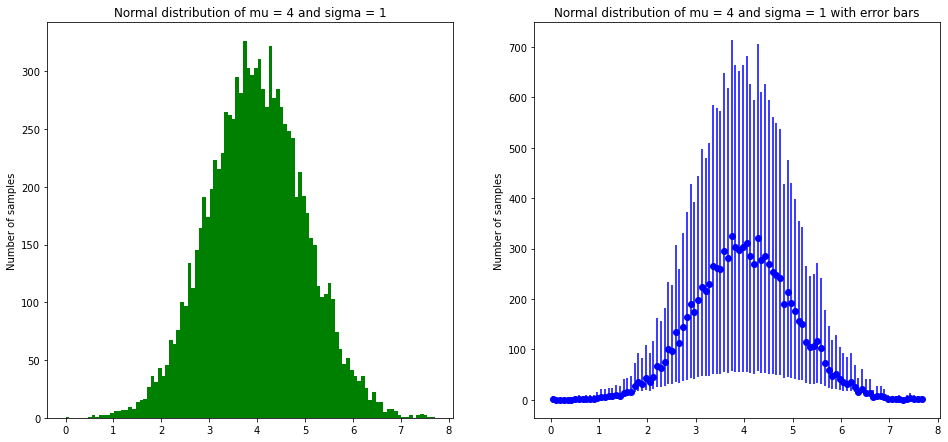

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter, AutoLocator
from scipy.stats import poisson
from sklearn import preprocessing
%matplotlib inline

N= 10000

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2,2, 1)
normal = np.random.normal(loc= 4, scale=1, size=N)
y, binEdges, _ = ax.hist(normal, bins=int(N**0.5), facecolor='green')

mean = np.mean(normal)
sigma = np.std(normal)

ax.set_title('Normal distribution of mu = 4 and sigma = 1')
ax.set_ylabel('Number of samples')
ax.yaxis.set_major_locator(AutoLocator())

ax2=fig.add_subplot(2,2,2)


bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

error =poisson.interval(0.999, y)
ax2.errorbar(bincenters, y, color='b', yerr=error, fmt='o')
ax2.set_title('Normal distribution of mu = 4 and sigma = 1 with error bars')
ax2.set_ylabel('Number of samples')
ax2.yaxis.set_major_locator(AutoLocator())
plt.show()

# ax3=fig.add_subplot(2,2,3)
# ndata =preprocessing.normalize([normal])
# ax3 = plt.bar(bincenters, ndata, width=0.05, color='r')
# plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

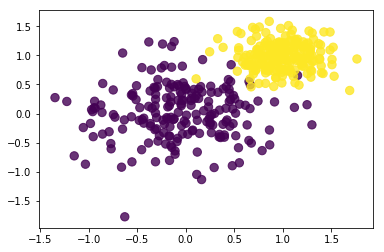

In [2]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


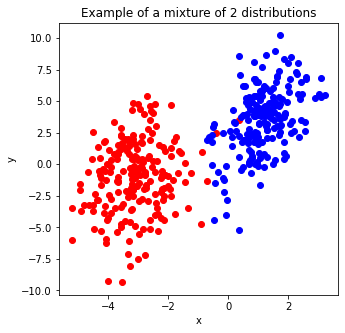

In [3]:
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

data1 = np.random.multivariate_normal([-3, -1], [[1, 0.9], [0.9, 8]], 200)
x, y = data1.T
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))


axes.scatter(x,y, c='r')
data1 = np.random.multivariate_normal([1, 3], [[0.5, 0.8], [0.8, 8]], 200)
x, y = data1.T
axes.scatter(x,y, c='b')
axes.set_title("Example of a mixture of 2 distributions")
axes.set_xlabel("x")
axes.set_ylabel("y");


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Int64Index([    2,     3,     4,     5,     6,     7,    57,    58,   148,
              179,
            ...
            11056, 11057, 11085, 11086, 11087, 11088, 11120, 11121, 11123,
            11125],
           dtype='int64', length=641)


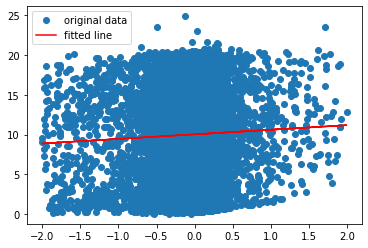

[-0.2959835336003669, -0.2326890516890542, -0.12482071783937412, -0.14455049712192505, -0.2001453634085242, -0.1462383022774262, -0.17629741379311353, -0.15187640692641624, -0.14156182472987142, -0.10455952380951856, -0.13981553884710432, -0.15214262371613743, -0.14778876678876568, -0.07896984126982959, -0.09486758339699586, -0.07805380036630237, -0.0892817460317334, -0.08193186423505436, -0.08596858124692558, -0.11951849390919231, -0.03659775065805652, -0.016604218880540624, -0.09117015873015058, -0.07592394822007244, -0.052433906342626346, -0.08403382287493645, -0.10633265947889067, -0.16738185941042968, -0.16413285977372852, -0.1619350427350291, -0.1740672398589077, -0.07961063011063084, -0.10778390022675591, -0.17847572590012256, -0.19241796536797126, -0.12949396217818754, -0.11210642966863066, -0.11448037457662119, -0.05658791208790822, -0.03705335628228876]


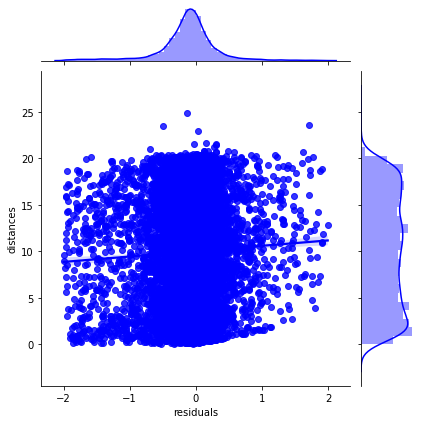

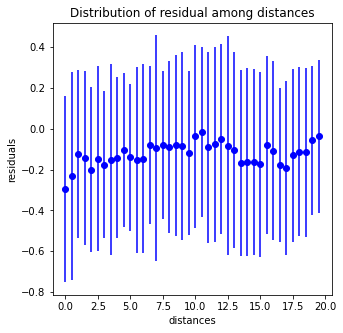

In [4]:
import pandas as pd
from scipy import stats
import seaborn as sns

data = np.load('residuals_261.npy', allow_pickle= True)
data = pd.DataFrame(data.item())
data.describe()
indexNames = data[ abs(data['residuals']) > 2 ].index
print(indexNames)
data.drop(indexNames , inplace=True)
data.describe()
x = data['residuals']
y = data['distances']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

g = sns.jointplot("residuals", "distances", data=data, kind="reg", color='b')

bi = 0.5
x = np.arange(0,20, bi)
j = 0.5
y =[]
err = []

for j in x:
    y.append(data[(data['distances'] > j) & (data['distances'] < j+0.5) ]['residuals'].mean())
    err.append(data[(data['distances'] > j) & (data['distances'] < j+0.5) ]['residuals'].std())
print(y)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))
ax.errorbar(x, y, color='b', yerr=err, fmt='o')
ax.set_title("Distribution of residual among distances")
ax.set_xlabel("distances")
ax.set_ylabel("residuals");
